In [1]:
import RCSystem
import defaultPose
import copy
rb = RCSystem.robot(duration=2, webcam=False)

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


[INFO]robot initializing...
initialize_robotParams


[INFO]Smoothly execution activated
[INFO]return_to_stable_state, self.robotParams are all set
[INFO]robot initialized.


In [2]:

rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)

[INFO]Smoothly execution activated


0

In [3]:
print(defaultPose.prototypeFacialExpressions['happiness'])

[86, 86, 128, 128, 128, 255, 255, 0, 255, 0, 0, 0, 255, 0, 0, 255, 255, 255, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]


In [4]:
print(rb.AUPose['StandardPose'])

[86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 122]


# cuntomize here

In [17]:
def change_one_axis(x, y, steps=25): 
    mypose = copy.deepcopy(rb.AUPose['StandardPose']) 
    mypose[x] = y
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=steps, isUsingSigmoid=True) # isSmoothly = True ,isRecording = True
    time.sleep(1)

In [22]:
global smoothSleepTime
smoothSleepTime = 0.05

change_one_axis(35-1, 30, 15)
change_one_axis(35-1, 230, 15)
returnnnnn()

[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
[INFO]Smoothly execution activated
returnnnnn


In [21]:
# import time 

# mypose = copy.deepcopy(rb.AUPose['StandardPose'])
# # mypose[3] = 128
# mypose[32] = 30
# mypose[33] = 128
# mypose[34] = 95
# # mypose[0] = mypose[1] 

# time.sleep(3)
# rb.switch_to_customizedPose(mypose)
# rb.connect_ros(True, False, steps=15, isUsingSigmoid=True) # isSmoothly = True ,isRecording = True

# time.sleep(1)

# mypose[32] = 220
# mypose[33] = 220
# mypose[34] = 30

# rb.switch_to_customizedPose(mypose)
# rb.connect_ros(True, False, steps=15, isUsingSigmoid=True) # isSmoothly = True ,isRecording = True


[INFO]Smoothly execution activated
[INFO]Smoothly execution activated


0

# return 

In [13]:
# return 
def returnnnnn():
    mypose = rb.AUPose['StandardPose']
    mypose[34] = 105
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False)
    print('returnnnnn')

In [14]:
returnnnnn()

[INFO]Smoothly execution activated
returnnnnn



# mypose[0] + mypose[5] <= 262

<Figure size 432x288 with 0 Axes>

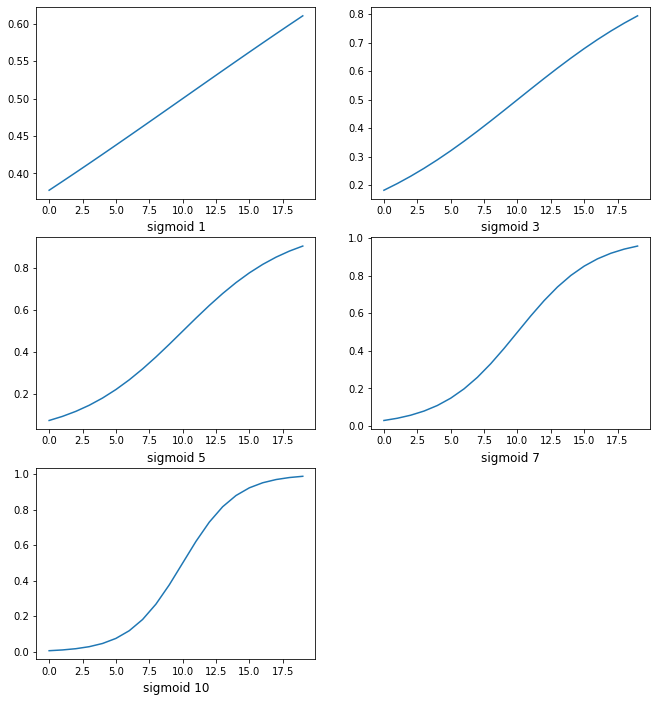

In [38]:
import math
import matplotlib.pyplot as plt
plt.subplots_adjust(hspace=2, wspace=1)
plt.figure(figsize=(11, 12))
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

for p, s in enumerate([1, 3, 5, 7, 10]):
    stepNum = 20
    y = []
    for i in range(stepNum):
        temp = sigmoid(s * (i / stepNum - 0.5))
        y.append(temp)
        # print(temp)
    x = [k for k in range(len(y))]

    plt.subplot(3, 2, p + 1)
    plt.plot(x, y)
    plt.title(f'sigmoid {s}', y=-0.2)
# start + (end - start)
plt.savefig('sigmoid.png', dpi=300, bbox_inches='tight')

In [106]:
# happy
import copy
mypose = copy.deepcopy(defaultPose.prototypeFacialExpressions['happiness'])
mypose[34] = 95
# mypose[0] = 142, 142

# mypose[0], mypose[1] = 255, 255
# mypose[5], mypose[6], mypose[7], mypose[8] = 120, 120, 0, 203
255 - mypose[0] + 255 - mypose[5] >= 248

mypose[7], mypose[8] = 0, 203
mypose[0] = 42
mypose[5] = 220
mypose[1] = mypose[0]
mypose[6] = mypose[5]
# mypose[6] = 255
rb.switch_to_customizedPose(mypose)
rb.connect_ros(True, False)

[INFO]Smoothly execution activated


0

In [ ]:




print(len(mypose))

# recover from 

In [6]:
# build my customize 
import copy
import numpy as np
import pandas as pd
# mypath = '/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/happiness/2023_12_25_17_03_54_happiness_50_axes_data.csv'
# mypath = '/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/happiness/2023_12_25_17_04_06_happiness_54_axes_data.csv'
# mypath = '/home/dongagent/github/CameraControl/ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/happiness/' + '2023_12_25_17_55_38_happiness_0_axes_data.csv'
# tmp_an = pd.read_csv(mypath)
# print(tmp_an)
# print(tmp_an['x1'])
# print(tmp_an['x6'])

In [11]:


def checkParameters(robotParams):
    # Axis (8, 9), (12, 13), (18, 19), (22, 23), 
    # we should use a * b = 0 for each group. 
    # Which means, take (8, 9) for example. 
    # When axis 8 has value, we should make sure axis 9 is set to 0. 
    if robotParams[8-1] * robotParams[9-1] != 0:
        robotParams[np.random.choice([8-1, 9-1])] = 0
    if robotParams[12-1] * robotParams[13-1] != 0:
        robotParams[np.random.choice([12-1, 13-1])] = 0
    if robotParams[18-1] * robotParams[19-1] != 0:
        robotParams[np.random.choice([18-1, 19-1])] = 0

    # This part might cause left not equal to right
    # if robotParams[22-1] * robotParams[23-1] != 0:
    #     robotParams[np.random.choice([22-1, 23-1])] = 0
        
    # x22 = x18, x23 = x19
    robotParams[21] = robotParams[17]
    robotParams[22] = robotParams[18]


    assert robotParams[8-1] * robotParams[9-1] == 0
    assert robotParams[12-1] * robotParams[13-1] == 0
    assert robotParams[18-1] * robotParams[19-1] == 0
    assert robotParams[22-1] * robotParams[23-1] == 0
    return robotParams

def fix_robot_param(fixedrobotcode):

    # x2 = x1, use one axis for eyes upper lid
    # fixedrobotcode[0] = 0
    fixedrobotcode[1] = fixedrobotcode[0]
    # x7 = x6, use one axis for eyes lower lid
    fixedrobotcode[6] = fixedrobotcode[5]
    # x12 = x8
    fixedrobotcode[11] = fixedrobotcode[7]
    # x13 = x9
    fixedrobotcode[12] = fixedrobotcode[8]
    # x14  = x10
    fixedrobotcode[13] = fixedrobotcode[9]
    # x17 = x16
    fixedrobotcode[16] = fixedrobotcode[15]
    # x22 = x18
    fixedrobotcode[21] = fixedrobotcode[17]
    # x23 = x19
    fixedrobotcode[22] = fixedrobotcode[18]
    # x24 = x20
    fixedrobotcode[23] = fixedrobotcode[19]
    # To open all axes
    # x4 = x3
    fixedrobotcode[3] = fixedrobotcode[2]
    # x15 = x11
    fixedrobotcode[14] = fixedrobotcode[10]
    fixedrobotcode = checkParameters(fixedrobotcode)
    return fixedrobotcode

def recover_param_from_csv(csv_name, steps=20):
    df = pd.read_csv(csv_name)
    neutral = [86, 86, 128, 128, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 128, 95]
    fixedrobotcode = copy.copy(neutral)
    # dict = {}
    for k,v in df.to_dict().items():
    #     print('k,v', k,v)
        if "x" in k:
            fixedrobotcode[int(k[1:])-1] = round(v[0])
    
    fixedrobotcode = fix_robot_param(fixedrobotcode)

    # control robot
    rb.switch_to_customizedPose(fixedrobotcode)
    global smoothSleepTime
    smoothSleepTime = 0.03
    returncode = rb.connect_ros(isSmoothly=True, isRecording=False, steps=steps) # isSmoothly = True ,isRecording = True
    time.sleep(0.5)
    


In [16]:
print(rb.robotParams)

{'x1': 84, 'x2': 84, 'x3': 128, 'x4': 128, 'x5': 128, 'x6': 198, 'x7': 198, 'x8': 93, 'x9': 0, 'x10': 0, 'x11': 0, 'x12': 93, 'x13': 0, 'x14': 0, 'x15': 0, 'x16': 255, 'x17': 255, 'x18': 255, 'x19': 0, 'x20': 255, 'x21': 0, 'x22': 255, 'x23': 0, 'x24': 255, 'x25': 0, 'x26': 0, 'x27': 0, 'x28': 255, 'x29': 0, 'x30': 162, 'x31': 0, 'x32': 68, 'x33': 128, 'x34': 128, 'x35': 95}


In [12]:
fn = '2023_12_25_18_57_16_happiness_426_axes_data.csv'
recover_param_from_csv(f'image_analysis/happiness/{fn}')

[INFO]Smoothly execution activated


In [93]:
# print(fixedrobotcode[0])
print(fixedrobotcode[32-1])

86
255


In [89]:
returnnnnn()
# fixedrobotcode[0] = 86
# fixedrobotcode[1] = fixedrobotcode[0]
# fixedrobotcode[5] = 255
# fixedrobotcode[6] = fixedrobotcode[5]
rb.switch_to_customizedPose(fixedrobotcode)
rb.connect_ros(True, False)

[INFO]Smoothly execution activated
returnnnnn
[INFO]Smoothly execution activated


0

In [ ]:
returnnnnn()

In [61]:
axes_data = ""

for i, axis in enumerate(fixedrobotcode):
    axes_data += f"x{i+1}: {axis}, "
print(axes_data)

x1: 120, x2: 120, x3: 128, x4: 128, x5: 128, x6: 0, x7: 0, x8: 106, x9: 0, x10: 255, x11: 0, x12: 0, x13: 35, x14: 255, x15: 0, x16: 255, x17: 255, x18: 200, x19: 0, x20: 158, x21: 0, x22: 200, x23: 0, x24: 158, x25: 0, x26: 0, x27: 0, x28: 255, x29: 143, x30: 0, x31: 0, x32: 0, x33: 128, x34: 128, x35: 95, 


In [2]:
from RCSystem import *
import RCSystem
import defaultPose
import copy
import time
rb = RCSystem.robot(duration=3, webcam=True)

[INFO]robot initializing...
initialize_robotParams


[INFO]Smoothly execution activated
[INFO]return_to_stable_state, self.robotParams are all set
[INFO]WebcamStreamWidget initializing...
[INFO]WebcamStreamWidget initialized.
[INFO]robot and webcam initialized.


In [7]:
def py_feat_analysis(img, target_emotion, is_save_csv=True):
    from feat import Detector
    '''
        @img: file name 
        @target_emotion: Anger, Disgust, Fear, Happiness, Sadness, Surprise
    '''
    global detector
    
    image_prediction = detector.detect_image(img)
    df = image_prediction.head()
    if FEAT_VERSION == 0:
        emo_df = df.iloc[-1:,-8:] # feat 0.3.7
    elif FEAT_VERSION == 1:
        emo_df = df.iloc[-1:,-9:-1] # feat 0.5.0
    else:
        raise Exception("FEAT_VERSION is not correct")

    if is_save_csv:
        csv_name = img[:-4]+".csv"
        csv_emotion_name = img[:-4]+"_emotion.csv"
        df.to_csv(csv_name)
        emo_df.to_csv(csv_emotion_name)
    targetID = get_target(target_emotion)
    if DEBUG > 0:
        print("[INFO]py_feat_analysis: {}".format(list(df[target_emotion])[0]))
    # return emo_df.iloc[0,targetID]
    return list(df[target_emotion])[0]

In [15]:

headYaw_fix_flag = True
headYaw_fix = 95
global detector
detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')
for k,v in defaultPose.prototypeFacialExpressions.items():
    if k == 'neutral':
        continue
    print("switch to: ", k)
    v[34] = 95
    rb.switch_to_customizedPose(v)
    rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True
    rb.take_picture_cv(isUsingCounter=False, appendix='{}_{}'.format(k, 'test'), folder=k)
    time.sleep(3)
    print("py_feat_analysis result is: ", py_feat_analysis(rb.fileName, k))

    # save robot param data
    robot_param = pd.DataFrame({k:[v] for k, v in rb.robotParams.items()})
    robot_param_name = rb.readablefileName[:-4]+"_rb_paramdata.csv"
    robot_param.to_csv(robot_param_name, index=False, sep=',')

rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)

switch to:  anger
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


py_feat_analysis result is:  0.02138419821858406
switch to:  disgust
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


py_feat_analysis result is:  0.03056081011891365
switch to:  fear
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


py_feat_analysis result is:  0.01827377825975418
switch to:  happiness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


py_feat_analysis result is:  0.23581530153751373
switch to:  sadness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


py_feat_analysis result is:  0.5012462735176086
switch to:  surprise
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


py_feat_analysis result is:  0.6261047720909119
[INFO]Smoothly execution activated


0

In [17]:
headYaw_fix_flag = True
headYaw_fix = 95
global detector
detector = Detector(emotion_model = "resmasknet", landmark_model='mobilefacenet')
for k,v in defaultPose.hotExpressions.items():
    if k == 'neutral':
        continue
    print("switch to: ", k)
    v[34] = 95
    rb.switch_to_customizedPose(v)
    rb.connect_ros(isSmoothly=True, isRecording=False) # isSmoothly = True ,isRecording = True
    rb.take_picture_cv(isUsingCounter=False, appendix='{}_{}'.format(k, 'test'), folder=k)
    time.sleep(3)
    print("py_feat_analysis result is: ", py_feat_analysis(rb.fileName, k[3:].lower()))

    # save robot param data
    robot_param = pd.DataFrame({k:[v] for k, v in rb.robotParams.items()})
    robot_param_name = rb.readablefileName[:-4]+"_rb_paramdata.csv"
    robot_param.to_csv(robot_param_name, index=False, sep=',')

rb.switch_to_customizedPose(rb.AUPose['StandardPose'])
rb.connect_ros(True, False)


switch to:  hotAnger
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]


py_feat_analysis result is:  0.1619025468826294
switch to:  hotDisgust
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.13s/it]


py_feat_analysis result is:  3.043833567062393e-05
switch to:  hotFear
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


py_feat_analysis result is:  0.39156797528266907
switch to:  hotHappiness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]


py_feat_analysis result is:  0.034188851714134216
switch to:  hotSadness
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


py_feat_analysis result is:  0.05745970457792282
switch to:  hotSurprise
[INFO]Smoothly execution activated
[INFO]frame captured.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]


py_feat_analysis result is:  0.9935128092765808
[INFO]Smoothly execution activated


0